<a href="https://colab.research.google.com/github/NimashaSavindi/Diabetes-Risk-Prediction/blob/main/Baseline_DRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Completeness & Initial Formatting

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Diabetes Risk Assessment – Anonymous Health Survey  (Responses) - Form Responses 2.csv")

In [ ]:
print(df.shape)

(195, 15)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   Column 1                                                                      195 non-null    object
 1   Age                                                                           195 non-null    int64 
 2   Gender                                                                        195 non-null    object
 3   Weight(kg)                                                                    195 non-null    object
 4   Height(cm)                                                                    195 non-null    object
 5   Physical Activity Level                                                       195 non-null    object
 6     How would you describe your typical diet

Clean Column Names Early.Removes extra spaces

In [ ]:
df.columns = df.columns.str.strip()

data handleing

Remove non-numeric characters and convert to float

In [ ]:
df["Height(cm)"] = df["Height(cm)"].str.extract('(\d+\.?\d*)').astype(float)
df["Weight(kg)"] = df["Weight(kg)"].str.extract('(\d+\.?\d*)').astype(float)

Clean Sleep Hours if values are like "6-7 hours".Replace ranges like "6-7 hours" with average (6.5)

In [ ]:
print(df["Average hours of sleep per night"].unique())

['6-7' '6' '5-6 hr' '5' '5-6h' '7' '5 hours' '4hours' '3 hours per day '
 '4 - 6 hours' '6 hours ' '8' '4/5 hours ' '7 hours' '5 or 6' '5hr' '9'
 '8hr' '6 hours' '5 hours ' '6 Hours' '6 h' '5h' '7h' '4h' '6h' '4' '3'
 '3h']


In [ ]:
df["Average hours of sleep per night"] = df["Average hours of sleep per night"].astype(str).str.strip()

sleep_mapping = {
    "Less than 5 hours": 4.5,
    "More than 8 hours": 9,
    "5-6": 5.5,
    "5-6 hr": 5.5,
    "6-7": 6.5,
    "6-7 hours": 6.5,
    "6": 6,
    "7-8": 7.5,
    "7-8 hours": 7.5,
    "7": 7,
    "8": 8,
    "9": 9
}

df["Average hours of sleep per night"] = df["Average hours of sleep per night"].replace(sleep_mapping)

In [ ]:
df["Average hours of sleep per night"] = df["Average hours of sleep per night"].astype(str).str.strip().str.lower()

In [ ]:
import re

def clean_sleep_value(val):
    val = val.strip().lower()

    # Handle known string patterns first
    if "less" in val:
        return 4.5
    if "more" in val:
        return 9
    if "or" in val:
        return sum([int(x) for x in re.findall(r'\d+', val)]) / 2
    if re.match(r'^\d+$', val):  # simple numeric
        return float(val)

    # Extract numbers from ranges like "5-6", "4 - 6 hours"
    nums = re.findall(r'\d+', val)
    if len(nums) == 1:
        return float(nums[0])
    elif len(nums) == 2:
        return sum([int(n) for n in nums]) / 2
    else:
        return None  # fallback if we can't parse it

In [ ]:
df["Average hours of sleep per night"] = df["Average hours of sleep per night"].apply(clean_sleep_value)


In [ ]:
print(df["Average hours of sleep per night"].unique())
print(df["Average hours of sleep per night"].dtype)

[5.5 6.  5.  7.  4.  3.  8.  4.5 9. ]
float64


Feature Engineering

Create BMI Feature

In [ ]:
df["Height(m)"] = df["Height(cm)"] / 100
df["BMI"] = df["Weight(kg)"] / (df["Height(m)"]**2)

def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df["BMICategory"] = df["BMI"].apply(bmi_category)

In [ ]:
df.head()

,Column 1,Age,Gender,Weight(kg),Height(cm),Physical Activity Level,How would you describe your typical diet?,Do you have a family history of diabetes?,Have you been diagnosed with hypertension(high blood pressure)?,Have you been diagnosed with heart disease?,Smoking Habits?,Average hours of sleep per night,Alcohol Consumption,Do you usually eat your meals at regular times each day?,How often do you feel stressed or emotionally overwhelmed in a typical week?,Height(m),BMI,BMICategory
0,7/12/2025 20:42:04,24,Female,48.0,157.0,Low (Little to no regular physical activity),"Unhealthy (Mostly high-sugar, high-fat, or pro...",No,No,No,I do not smoke,5.5,None (I do not drink alcohol),I often skip meals,Sometimes,1.57,19.473407,Normal
1,7/12/2025 21:09:42,24,Female,45.0,165.0,Low (Little to no regular physical activity),Moderately Healthy (Mixed diet with occasional...,No,No,No,I do not smoke,6.0,None (I do not drink alcohol),"No, meal times vary",Sometimes,1.65,16.528926,Underweight
2,7/12/2025 21:13:29,25,Female,64.0,163.0,Moderate – Some physical activity 1–3 days a w...,Moderately Healthy (Mixed diet with occasional...,No,No,yes,I do not smoke,5.0,None (I do not drink alcohol),"No, meal times vary",Often,1.63,24.088223,Normal
3,7/12/2025 21:14:58,26,Female,52.0,157.0,Moderate – Some physical activity 1–3 days a w...,Moderately Healthy (Mixed diet with occasional...,Yes,No,No,I do not smoke,5.0,None (I do not drink alcohol),"No, meal times vary",Sometimes,1.57,21.096191,Normal
4,7/12/2025 21:25:54,25,Female,48.0,149.0,Moderate – Some physical activity 1–3 days a w...,"Healthy (Balanced diet with mix of carbs, prot...",No,No,No,I do not smoke,5.5,None (I do not drink alcohol),"Yes, mostly at the same time",Sometimes,1.49,21.620648,Normal


Removing duplicated rows

In [ ]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.")

Removed 0 duplicate rows.


Creating Age Groups

In [ ]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[20, 30, 40, 50, 60, 100], labels=["20s", "30s", "40s", "50s", "60+"])

Feature Selection / Transformation

Correlation Metrix

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

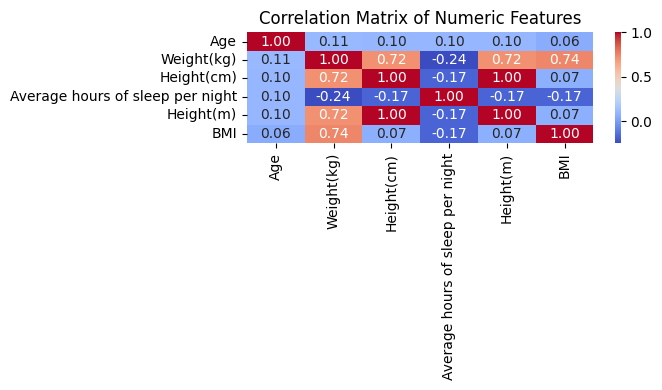

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

Encoding and Normalization

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["AgeGroup"] = le.fit_transform(df["AgeGroup"].astype(str))


One-hot encode and other catergorical features

In [ ]:

categorical_cols = [
    "Gender",
    "Physical Activity Level",
    "How would you describe your typical diet?",
    "Do you have a family history of diabetes?",
    "Have you been diagnosed with hypertension(high blood pressure)?",
    "Have you been diagnosed with heart disease?",
    "Smoking Habits?",
    "Alcohol Consumption",
    "Do you usually eat your meals at regular times each day?",
    "How often do you feel stressed or emotionally overwhelmed in a typical week?",
]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
target = df["Do you have a family history of diabetes?_Yes"]
features = df.drop(columns=["Do you have a family history of diabetes?_Yes"])


StandardScaler Encoding - Normalize Numerical Features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ["Age", "BMI", "Average hours of sleep per night", "Weight(kg)", "Height(cm)"]

df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

Preprocessed Dataset

In [ ]:
df.to_csv('preprocessed_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('preprocessed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train and Evaluate the Model

Import Libraries

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

Load Data and Set Features/Target

In [ ]:
df = pd.read_csv("preprocessed_data.csv")

# Drop non-feature columns
df = df.drop(columns=["Column 1", "BMICategory", "Gender_male",
                      "Have you been diagnosed with hypertension(high blood pressure)?_yes",
                      "Have you been diagnosed with heart disease?_yes"])

# Define target column (label)
target = "Do you have a family history of diabetes?_Yes"

# Features and labels
X = df.drop(columns=[target])
y = df[target].astype(int)

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
df['Diabetes_Risk'] = (
    # Rule 1: Diet Unhealthy AND Activity Low
    (df['How would you describe your typical diet?_Unhealthy (Mostly high-sugar, high-fat, or processed foods with few fruits/vegetables)'] == 1) &
    (df['Physical Activity Level_Low (Little to no regular physical activity)'] == 1) |

    # Rule 2: Poor Sleep (<5 hours) AND High Stress
    (df['AgeGroup'] < 5.0) &
    (df['How often do you feel stressed or emotionally overwhelmed in a typical week?_Often'] == 1) |

    # Rule 3: Smoking 3–6 times per week
    (df['Smoking Habits?_3-6 times per week'] == 1) |

    # Rule 4: Irregular meals AND Unhealthy diet
    (df['Do you usually eat your meals at regular times each day?_No, meal times vary'] == 1) &
    (df['How would you describe your typical diet?_Unhealthy (Mostly high-sugar, high-fat, or processed foods with few fruits/vegetables)'] == 1) |

    # Rule 5: Family history of diabetes
    (df['Do you have a family history of diabetes?_Yes'] == 1) |

    # Rule 6: Heart disease or Hypertension
    (df['Have you been diagnosed with heart disease?_Yes'] == 1) |
    (df['Have you been diagnosed with hypertension(high blood pressure)?_Yes'] == 1) |

    # Rule 8: Alcohol Occasional AND Smoking Occasional
    (df['Alcohol Consumption_Occasional (e.g., social drinking, 1–2 times per month)'] == 1) &
    (df['Smoking Habits?_Occasionally (Less than once a week)'] == 1)
).astype(int)


In [ ]:
print(df['Diabetes_Risk'].value_counts())

Diabetes_Risk
1    144
0     51
Name: count, dtype: int64


In [ ]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Set target
target = 'Diabetes_Risk'

# Set features (drop the label column itself)
X = df.drop(columns=[target])

# Keep only numeric/binary columns
X = X.select_dtypes(include=['int64', 'float64', 'bool'])

# Convert all bools to int
X = X.astype(int)

# Target
y = df[target]

Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Build the Neural Network Architecture

In [ ]:
model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the Model

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

Summary of the Model

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,133 (16.15 KB)

 Trainable params: 1,377 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,756 (10.77 KB)

Train Model

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5968 - loss: 0.6828 - val_accuracy: 0.7436 - val_loss: 0.5904
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6357 - loss: 0.6436 - val_accuracy: 0.7949 - val_loss: 0.5461
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7798 - loss: 0.5469 - val_accuracy: 0.8205 - val_loss: 0.5127
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7054 - loss: 0.5818 - val_accuracy: 0.7692 - val_loss: 0.4894
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7164 - loss: 0.5696 - val_accuracy: 0.7692 - val_loss: 0.4708
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7477 - loss: 0.5109 - val_accuracy: 0.7949 - val_loss: 0.4554
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7855 - loss: 0.4629 - val_accuracy: 0.7949 - val_loss: 0.4398
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8144 - loss: 0.4454 - val_accuracy: 0.7949 - v

Accuracy And Loss Curves

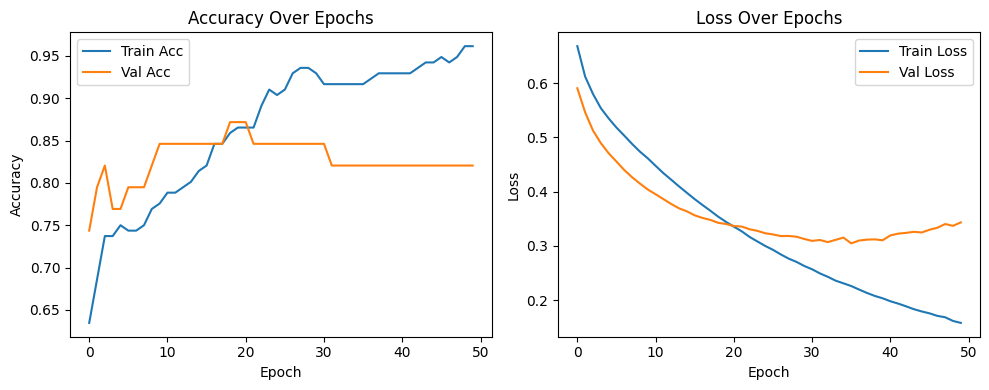

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Confusion Metrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Test Accuracy: 0.8205128205128205


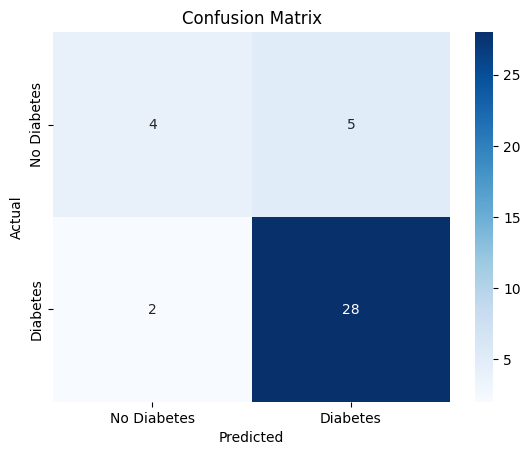

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions on test set (probabilities)
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)

# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.85      0.93      0.89        30

    accuracy                           0.82        39
   macro avg       0.76      0.69      0.71        39
weighted avg       0.81      0.82      0.81        39



ROC and AUC score

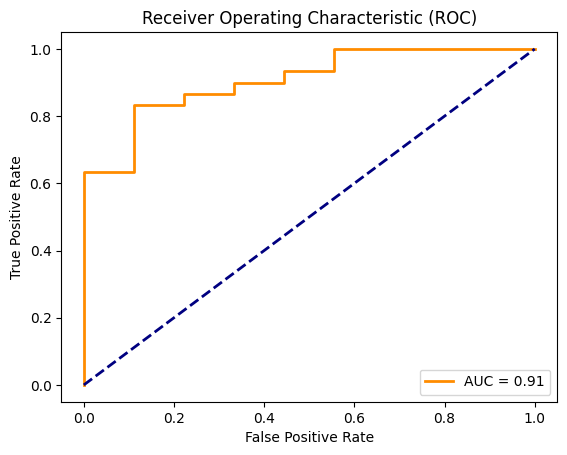

AUC Score: 0.9074074074074074


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", roc_auc)